In [29]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

data = pd.read_csv("../dataset.csv", sep=",", header=None)

data

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,0.627050,0.490080,-0.276668,0.999987,0.631393,0.482772,-0.270744,0.999976,0.631643,0.482014,...,0.619157,0.438575,0.538741,0.344932,0.643967,0.443103,0.548671,0.237389,0.747265,0
1,0.622729,0.409856,-0.458433,0.999872,0.622703,0.394793,-0.443039,0.999608,0.622897,0.393045,...,0.921510,0.410610,0.522264,0.374161,0.480413,0.409717,0.535545,0.254456,0.927055,0
2,0.385565,0.465025,-0.254139,0.999295,0.385100,0.454772,-0.268144,0.999718,0.385864,0.454329,...,0.485378,0.449818,0.706974,-0.030359,0.933297,0.393914,0.656959,0.177830,0.740413,0
3,0.462100,0.499737,-0.190316,0.990435,0.462568,0.492878,-0.200159,0.996821,0.463493,0.491687,...,0.298651,0.466332,0.713875,-0.184212,0.994832,0.423805,0.662011,0.032848,0.593875,0
4,0.446797,0.511298,0.025002,0.999607,0.442528,0.496020,0.023545,0.999842,0.442788,0.494904,...,0.854868,0.467363,0.731846,-0.385618,0.999572,0.420516,0.670805,-0.188266,0.888976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.586412,0.577099,-0.229996,0.990629,0.592483,0.579054,-0.244982,0.997930,0.592549,0.581036,...,0.202170,0.415907,0.576814,0.187183,0.739666,0.505774,0.542903,0.359826,0.150021,3
336,0.593622,0.550449,-0.249980,0.997944,0.599962,0.548119,-0.267469,0.999541,0.600588,0.550381,...,0.239658,0.420063,0.572562,0.185052,0.694259,0.480513,0.560969,0.402822,0.141607,3
337,0.596182,0.548583,-0.272557,0.989266,0.601501,0.549218,-0.290172,0.997811,0.601951,0.551157,...,0.296057,0.415834,0.573700,0.198830,0.785800,0.472308,0.576033,0.405472,0.190261,3
338,0.574801,0.584575,-0.241681,0.974741,0.579115,0.590557,-0.253313,0.991607,0.579157,0.593020,...,0.231124,0.423864,0.575765,0.180962,0.834046,0.512144,0.541827,0.252285,0.239624,3


<AxesSubplot:ylabel='count'>

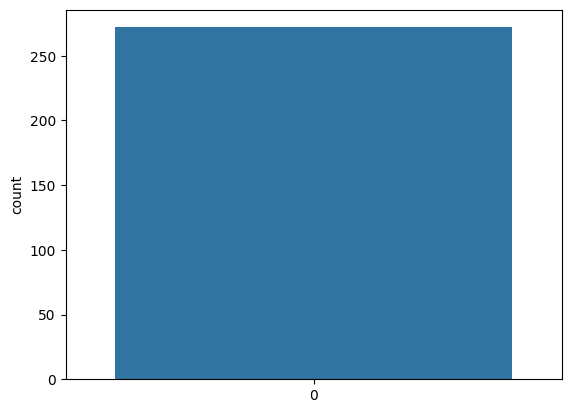

In [49]:
#학습용 데이터, 검증용 데이터 나누기
x_train, x_valid, y_train, y_valid = train_test_split(data.drop(132, axis=1), data[132], test_size=0.2)

x_train.shape, y_train.shape

sns.countplot(y_train)

In [31]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [32]:
#knn 최적 k값 찾기 1~26 까지 설정
k_range = range(1,26)
scores = {}
score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_valid)
    scores[k] = metrics.accuracy_score(y_valid,y_pred)
    print('k is %d, score is %f' %(k, scores[k]))
    score_list.append(metrics.accuracy_score(y_valid,y_pred))

k is 1, score is 0.838235
k is 2, score is 0.838235
k is 3, score is 0.882353
k is 4, score is 0.823529
k is 5, score is 0.794118
k is 6, score is 0.735294
k is 7, score is 0.750000
k is 8, score is 0.750000
k is 9, score is 0.720588
k is 10, score is 0.735294
k is 11, score is 0.720588
k is 12, score is 0.705882
k is 13, score is 0.705882
k is 14, score is 0.720588
k is 15, score is 0.720588
k is 16, score is 0.705882
k is 17, score is 0.691176
k is 18, score is 0.705882
k is 19, score is 0.720588
k is 20, score is 0.705882
k is 21, score is 0.691176
k is 22, score is 0.661765
k is 23, score is 0.705882
k is 24, score is 0.676471
k is 25, score is 0.617647


In [37]:
model = KNeighborsClassifier(n_neighbors=3)
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [38]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
#모델 학습 후 정확도 측정
y_pred = model.predict(x_valid)
print("accuracy_score: %.2f" % accuracy_score(y_valid, y_pred))

accuracy_score: 0.88


In [40]:
#pickle파일로 모델 저장
import pickle
pickle.dump(model, open('../poseModel.pickle', 'wb'))